The dataset consists of aerial imagery of Dubai obtained by MBRSC satellites and annotated with pixel-wise semantic segmentation in 6 classes. The total volume of the dataset is 72 images grouped into 6 larger tiles. The classes are:

Building: #3C1098
Land (unpaved area): #8429F6
Road: #6EC1E4
Vegetation: #FEDD3A
Water: #E2A929
Unlabeled: #9B9B9B

Use patchify....
Tile 1: 797 x 644 --> 768 x 512 --> 6
Tile 2: 509 x 544 --> 512 x 256 --> 2
Tile 3: 682 x 658 --> 512 x 512  --> 4
Tile 4: 1099 x 846 --> 1024 x 768 --> 12
Tile 5: 1126 x 1058 --> 1024 x 1024 --> 16
Tile 6: 859 x 838 --> 768 x 768 --> 9
Tile 7: 1817 x 2061 --> 1792 x 2048 --> 56
Tile 8: 2149 x 1479 --> 1280 x 2048 --> 40
Total 9 images in each folder * (145 patches) = 1305
Total 1305 patcf size 256x256

"""

In [2]:
import os
import cv2
import numpy as np

from matplotlib import pyplot as plt
from patchify import patchify
from PIL import Image
from tensorflow.keras.metrics import MeanIoU

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

Reading the images from repsective 'images' subdirectory
As all images are of different size we have 2 options, either resize or crop
But, some images are too large and some small. Resizing will change the size of real objects.
Therefore, we will crop them to a nearest size divisible by 256 and then 
divide all images into patches of 256x256x3. 

For this specific dataset we could have added masks to the above code as masks have extension png

In [5]:
import os

root_directory = "C:/Users/Abhishek/OneDrive/Desktop/Image_Segmentation/Semantic_segmentation_dataset"
print(f"Does root directory exist? {os.path.exists(root_directory)}")
print(f"Contents of root directory: {os.listdir(root_directory)}")

Does root directory exist? True
Contents of root directory: ['classes.json', 'Tile 1', 'Tile 2', 'Tile 3', 'Tile 4', 'Tile 5', 'Tile 6', 'Tile 7', 'Tile 8']


In [6]:
for dirpath, dirnames, filenames in os.walk(root_directory):
    if 'images' in dirnames:
        print(f"Found 'images' subdirectory in: {dirpath}")
        image_dir = os.path.join(dirpath, 'images')
        print(f"Contents of 'images' directory: {os.listdir(image_dir)}")

Found 'images' subdirectory in: C:/Users/Abhishek/OneDrive/Desktop/Image_Segmentation/Semantic_segmentation_dataset\Tile 1
Contents of 'images' directory: ['image_part_001.jpg', 'image_part_002.jpg', 'image_part_003.jpg', 'image_part_004.jpg', 'image_part_005.jpg', 'image_part_006.jpg', 'image_part_007.jpg', 'image_part_008.jpg', 'image_part_009.jpg']
Found 'images' subdirectory in: C:/Users/Abhishek/OneDrive/Desktop/Image_Segmentation/Semantic_segmentation_dataset\Tile 2
Contents of 'images' directory: ['image_part_001.jpg', 'image_part_002.jpg', 'image_part_003.jpg', 'image_part_004.jpg', 'image_part_005.jpg', 'image_part_006.jpg', 'image_part_007.jpg', 'image_part_008.jpg', 'image_part_009.jpg']
Found 'images' subdirectory in: C:/Users/Abhishek/OneDrive/Desktop/Image_Segmentation/Semantic_segmentation_dataset\Tile 3
Contents of 'images' directory: ['image_part_001.jpg', 'image_part_002.jpg', 'image_part_003.jpg', 'image_part_004.jpg', 'image_part_005.jpg', 'image_part_006.jpg', 'ima

In [7]:
import glob

all_image_files = glob.glob(os.path.join(root_directory, "**", "*.jpg"), recursive=True) + \
                  glob.glob(os.path.join(root_directory, "**", "*.jpeg"), recursive=True) + \
                  glob.glob(os.path.join(root_directory, "**", "*.JPG"), recursive=True) + \
                  glob.glob(os.path.join(root_directory, "**", "*.JPEG"), recursive=True)

print(f"Total image files found: {len(all_image_files)}")
if all_image_files:
    print("First few image files:")
    for file in all_image_files[:5]:
        print(file)

Total image files found: 144
First few image files:
C:/Users/Abhishek/OneDrive/Desktop/Image_Segmentation/Semantic_segmentation_dataset\Tile 1\images\image_part_001.jpg
C:/Users/Abhishek/OneDrive/Desktop/Image_Segmentation/Semantic_segmentation_dataset\Tile 1\images\image_part_002.jpg
C:/Users/Abhishek/OneDrive/Desktop/Image_Segmentation/Semantic_segmentation_dataset\Tile 1\images\image_part_003.jpg
C:/Users/Abhishek/OneDrive/Desktop/Image_Segmentation/Semantic_segmentation_dataset\Tile 1\images\image_part_004.jpg
C:/Users/Abhishek/OneDrive/Desktop/Image_Segmentation/Semantic_segmentation_dataset\Tile 1\images\image_part_005.jpg


Use patchify....
Tile 1: 797 x 644 --> 768 x 512 --> 6
Tile 2: 509 x 544 --> 512 x 256 --> 2
Tile 3: 682 x 658 --> 512 x 512  --> 4
Tile 4: 1099 x 846 --> 1024 x 768 --> 12
Tile 5: 1126 x 1058 --> 1024 x 1024 --> 16
Tile 6: 859 x 838 --> 768 x 768 --> 9
Tile 7: 1817 x 2061 --> 1792 x 2048 --> 56
Tile 8: 2149 x 1479 --> 1280 x 2048 --> 40
Total 9 images in each folder * (145 patches) = 1305
Total 1305 patches of size 256x256

Found 9 jpg images in C:/Users/Abhishek/OneDrive/Desktop/Image_Segmentation/Semantic_segmentation_dataset\Tile 1\images
Processing image: C:/Users/Abhishek/OneDrive/Desktop/Image_Segmentation/Semantic_segmentation_dataset\Tile 1\images\image_part_001.jpg
Created 6 patches
Successfully processed image: image_part_001.jpg
Processing image: C:/Users/Abhishek/OneDrive/Desktop/Image_Segmentation/Semantic_segmentation_dataset\Tile 1\images\image_part_002.jpg
Created 6 patches
Successfully processed image: image_part_002.jpg
Processing image: C:/Users/Abhishek/OneDrive/Desktop/Image_Segmentation/Semantic_segmentation_dataset\Tile 1\images\image_part_003.jpg
Created 6 patches
Successfully processed image: image_part_003.jpg
Processing image: C:/Users/Abhishek/OneDrive/Desktop/Image_Segmentation/Semantic_segmentation_dataset\Tile 1\images\image_part_004.jpg
Created 6 patches
Successfully processed image: image_part_004.jpg
Processing image: C:/Users/Abhishek/OneDrive/Desktop/Image_Segmentation/

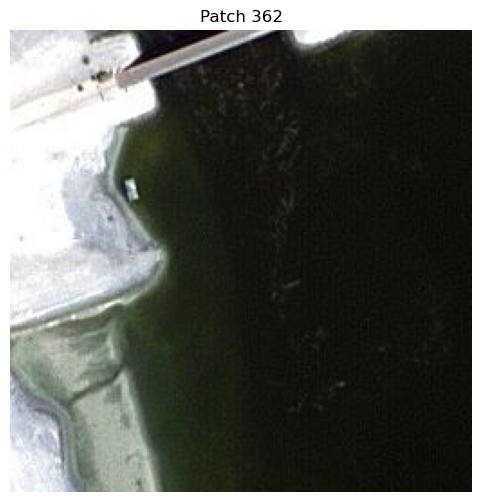

In [9]:
import os
import cv2
from PIL import Image
import numpy as np
from patchify import patchify
from sklearn.preprocessing import MinMaxScaler

root_directory = "C:/Users/Abhishek/OneDrive/Desktop/Image_Segmentation/Semantic_segmentation_dataset"
patch_size = 256
scaler = MinMaxScaler()

image_dataset = []
total_images_found = 0
total_images_processed = 0

for tile_folder in os.listdir(root_directory):
    tile_path = os.path.join(root_directory, tile_folder)
    if os.path.isdir(tile_path) and tile_folder.startswith("Tile"):
        images_folder = os.path.join(tile_path, "images")
        if os.path.exists(images_folder):
            images = [f for f in os.listdir(images_folder) if f.endswith(".jpg")]
            total_images_found += len(images)
            print(f"Found {len(images)} jpg images in {images_folder}")
            
            for image_name in images:
                try:
                    image_path = os.path.join(images_folder, image_name)
                    print(f"Processing image: {image_path}")
                    
                    image = cv2.imread(image_path, 1)
                    if image is None:
                        print(f"Failed to read image: {image_path}")
                        continue
                    
                    SIZE_X = (image.shape[1]//patch_size)*patch_size
                    SIZE_Y = (image.shape[0]//patch_size)*patch_size
                    image = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
                    image = image.crop((0, 0, SIZE_X, SIZE_Y))
                    image = np.array(image)
                    
                    patches_img = patchify(image, (patch_size, patch_size, 3), step=patch_size)
                    print(f"Created {patches_img.shape[0] * patches_img.shape[1]} patches")
                    
                    for i in range(patches_img.shape[0]):
                        for j in range(patches_img.shape[1]):
                            single_patch_img = patches_img[i,j,:,:]
                            single_patch_img = scaler.fit_transform(single_patch_img.reshape(-1, single_patch_img.shape[-1])).reshape(single_patch_img.shape)
                            single_patch_img = single_patch_img[0]
                            image_dataset.append(single_patch_img)
                    
                    total_images_processed += 1
                    print(f"Successfully processed image: {image_name}")
                except Exception as e:
                    print(f"Error processing image {image_name}: {str(e)}")

print(f"Total images found: {total_images_found}")
print(f"Total images processed: {total_images_processed}")
print(f"Total patches in image_dataset: {len(image_dataset)}")

image_dataset = np.array(image_dataset)
print("Final shape of image_dataset:", image_dataset.shape)

# If you want to visualize a random patch
if len(image_dataset) > 0:
    import matplotlib.pyplot as plt
    import random

    image_number = random.randint(0, len(image_dataset) - 1)
    plt.figure(figsize=(6, 6))
    plt.imshow(image_dataset[image_number])
    plt.axis('off')
    plt.title(f"Patch {image_number}")
    plt.show()
else:
    print("No images were processed.")

Found 9 png masks in C:/Users/Abhishek/OneDrive/Desktop/Image_Segmentation/Semantic_segmentation_dataset\Tile 1\masks
Processing mask: C:/Users/Abhishek/OneDrive/Desktop/Image_Segmentation/Semantic_segmentation_dataset\Tile 1\masks\image_part_001.png
Created 6 patches
Successfully processed mask: image_part_001.png
Processing mask: C:/Users/Abhishek/OneDrive/Desktop/Image_Segmentation/Semantic_segmentation_dataset\Tile 1\masks\image_part_002.png
Created 6 patches
Successfully processed mask: image_part_002.png
Processing mask: C:/Users/Abhishek/OneDrive/Desktop/Image_Segmentation/Semantic_segmentation_dataset\Tile 1\masks\image_part_003.png
Created 6 patches
Successfully processed mask: image_part_003.png
Processing mask: C:/Users/Abhishek/OneDrive/Desktop/Image_Segmentation/Semantic_segmentation_dataset\Tile 1\masks\image_part_004.png
Created 6 patches
Successfully processed mask: image_part_004.png
Processing mask: C:/Users/Abhishek/OneDrive/Desktop/Image_Segmentation/Semantic_segmen

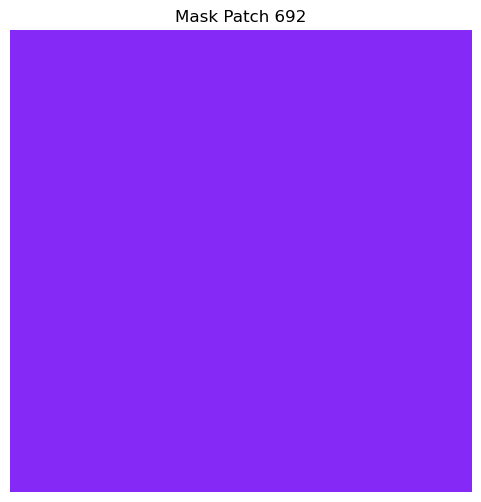

In [10]:
import os
import cv2
from PIL import Image
import numpy as np
from patchify import patchify

root_directory = "C:/Users/Abhishek/OneDrive/Desktop/Image_Segmentation/Semantic_segmentation_dataset"
patch_size = 256

mask_dataset = []
total_masks_found = 0
total_masks_processed = 0

for tile_folder in os.listdir(root_directory):
    tile_path = os.path.join(root_directory, tile_folder)
    if os.path.isdir(tile_path) and tile_folder.startswith("Tile"):
        masks_folder = os.path.join(tile_path, "masks")
        if os.path.exists(masks_folder):
            masks = [f for f in os.listdir(masks_folder) if f.endswith(".png")]
            total_masks_found += len(masks)
            print(f"Found {len(masks)} png masks in {masks_folder}")
            
            for mask_name in masks:
                try:
                    mask_path = os.path.join(masks_folder, mask_name)
                    print(f"Processing mask: {mask_path}")
                    
                    mask = cv2.imread(mask_path, 1)
                    if mask is None:
                        print(f"Failed to read mask: {mask_path}")
                        continue
                    
                    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
                    SIZE_X = (mask.shape[1]//patch_size)*patch_size
                    SIZE_Y = (mask.shape[0]//patch_size)*patch_size
                    mask = Image.fromarray(mask)
                    mask = mask.crop((0, 0, SIZE_X, SIZE_Y))
                    mask = np.array(mask)
                    
                    patches_mask = patchify(mask, (patch_size, patch_size, 3), step=patch_size)
                    print(f"Created {patches_mask.shape[0] * patches_mask.shape[1]} patches")
                    
                    for i in range(patches_mask.shape[0]):
                        for j in range(patches_mask.shape[1]):
                            single_patch_mask = patches_mask[i,j,:,:]
                            single_patch_mask = single_patch_mask[0]  # Drop the extra unnecessary dimension that patchify adds
                            mask_dataset.append(single_patch_mask)
                    
                    total_masks_processed += 1
                    print(f"Successfully processed mask: {mask_name}")
                except Exception as e:
                    print(f"Error processing mask {mask_name}: {str(e)}")

print(f"Total masks found: {total_masks_found}")
print(f"Total masks processed: {total_masks_processed}")
print(f"Total patches in mask_dataset: {len(mask_dataset)}")

mask_dataset = np.array(mask_dataset)
print("Final shape of mask_dataset:", mask_dataset.shape)

# If you want to visualize a random patch
if len(mask_dataset) > 0:
    import matplotlib.pyplot as plt
    import random

    mask_number = random.randint(0, len(mask_dataset) - 1)
    plt.figure(figsize=(6, 6))
    plt.imshow(mask_dataset[mask_number])
    plt.axis('off')
    plt.title(f"Mask Patch {mask_number}")
    plt.show()
else:
    print("No masks were processed.")

Building: #3C1098
Land (unpaved area): #8429F6
Road: #6EC1E4
Vegetation: #FEDD3A
Water: #E2A929
Unlabeled: #9B9B9B

Calculating RGB from HEX: #3C1098
3C = 3*16 + 12 = 60
10 = 1*16 + 0 = 16
98 = 9*16 + 8 = 152

In [12]:
#Convert HEX to RGB array
# Try the following to understand how python handles hex values...
a=int('3C', 16)  #3C with base 16. Should return 60. 
print(a)
#Do the same for all RGB channels in each hex code to convert to RGB
Building = '#3C1098'.lstrip('#')
Building = np.array(tuple(int(Building[i:i+2], 16) for i in (0, 2, 4))) # 60, 16, 152

Land = '#8429F6'.lstrip('#')
Land = np.array(tuple(int(Land[i:i+2], 16) for i in (0, 2, 4))) #132, 41, 246

Road = '#6EC1E4'.lstrip('#') 
Road = np.array(tuple(int(Road[i:i+2], 16) for i in (0, 2, 4))) #110, 193, 228

Vegetation =  'FEDD3A'.lstrip('#') 
Vegetation = np.array(tuple(int(Vegetation[i:i+2], 16) for i in (0, 2, 4))) #254, 221, 58

Water = 'E2A929'.lstrip('#') 
Water = np.array(tuple(int(Water[i:i+2], 16) for i in (0, 2, 4))) #226, 169, 41

Unlabeled = '#9B9B9B'.lstrip('#') 
Unlabeled = np.array(tuple(int(Unlabeled[i:i+2], 16) for i in (0, 2, 4))) #155, 155, 155

60


In [13]:
label = single_patch_mask

In [14]:
def rgb_to_2D_label(label):
    """
    Suply our labale masks as input in RGB format. 
    Replace pixels with specific RGB values ...
    """
    label_seg = np.zeros(label.shape,dtype=np.uint8)
    label_seg [np.all(label == Building,axis=-1)] = 0
    label_seg [np.all(label==Land,axis=-1)] = 1
    label_seg [np.all(label==Road,axis=-1)] = 2
    label_seg [np.all(label==Vegetation,axis=-1)] = 3
    label_seg [np.all(label==Water,axis=-1)] = 4
    label_seg [np.all(label==Unlabeled,axis=-1)] = 5
    
    label_seg = label_seg[:,:,0]  #Just take the first channel, no need for all 3 channels
    
    return label_seg

In [15]:
labels = []
for i in range(mask_dataset.shape[0]):
    label = rgb_to_2D_label(mask_dataset[i])
    labels.append(label)    

labels = np.array(labels)   
labels = np.expand_dims(labels, axis=3)

In [16]:
print("Unique labels in label dataset are: ", np.unique(labels))

Unique labels in label dataset are:  [0 1 2 3 4 5]


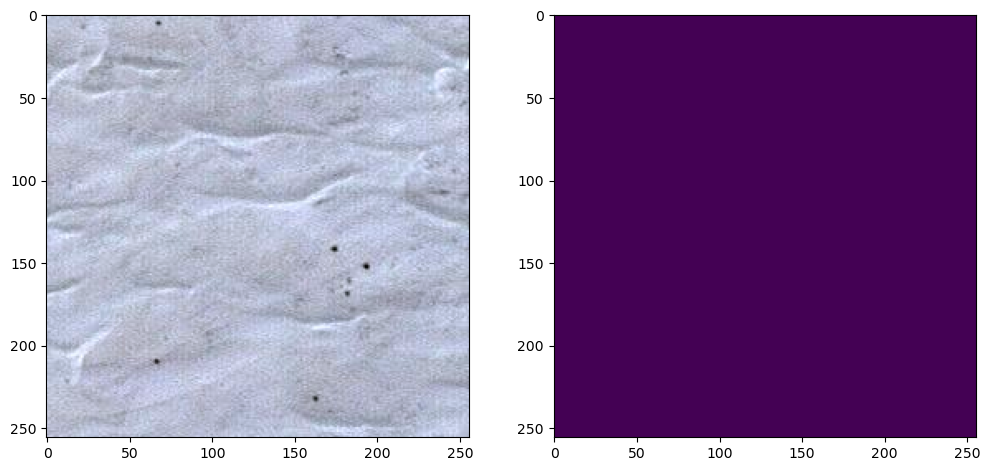

In [17]:
#Another Sanity check, view few mages
import random
import numpy as np
image_number = random.randint(0, len(image_dataset))
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(image_dataset[image_number])
plt.subplot(122)
plt.imshow(labels[image_number][:,:,0])
plt.show()

In [18]:
n_classes = len(np.unique(labels))
from keras.utils import to_categorical
labels_cat = to_categorical(labels, num_classes=n_classes)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_dataset, labels_cat, test_size = 0.20, random_state = 42)

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import MeanIoU

def dice_coef(y_true, y_pred, smooth=1):
    y_true_f = tf.reshape(y_true, [-1])
    y_pred_f = tf.reshape(y_pred, [-1])
    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f) + smooth)

def dice_loss(y_true, y_pred):
    return 1 - dice_coef(y_true, y_pred)

def categorical_focal_loss(alpha, gamma=2.):
    def focal_loss(y_true, y_pred):
        y_pred = tf.clip_by_value(y_pred, tf.keras.backend.epsilon(), 1.0 - tf.keras.backend.epsilon())
        loss = - y_true * tf.math.log(y_pred) * tf.math.pow(1 - y_pred, gamma)
        loss = tf.reduce_mean(tf.reduce_sum(loss * alpha, axis=-1))
        return loss
    return focal_loss

def combined_loss(y_true, y_pred):
    weights = [0.1666, 0.1666, 0.1666, 0.1666, 0.1666, 0.1666]
    alpha = tf.constant(weights, dtype=tf.float32)
    
    dice = dice_loss(y_true, y_pred)
    focal = categorical_focal_loss(alpha=alpha)(y_true, y_pred)
    
    return dice + focal

In [20]:
IMG_HEIGHT = X_train.shape[1]
IMG_WIDTH  = X_train.shape[2]
IMG_CHANNELS = X_train.shape[3]

In [34]:
import nbimporter
from Unet_Model import multi_unet_model, jaccard_coef

In [36]:
metrics=['accuracy', jaccard_coef]

def get_model():
    return multi_unet_model(n_classes=n_classes, IMG_HEIGHT=IMG_HEIGHT, IMG_WIDTH=IMG_WIDTH, IMG_CHANNELS=IMG_CHANNELS)

In [38]:
model = get_model()
model.compile(optimizer='adam', loss=combined_loss, metrics=metrics)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 256, 256, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 256, 256, 16)      │             448 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout (Dropout)             │ (None, 256, 256, 16)      │               0 │ conv2d[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_1 (Conv2D)             │ (None, 256, 256, 16)      │           2,320 │ dropout[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 128, 128, 16)      │               0 │ conv2d_1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_2 (Conv2D)             │ (None, 128, 128, 32)      │           4,640 │ max_pooling2d[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_1 (Dropout)           │ (None, 128, 128, 32)      │               0 │ conv2d_2[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_3 (Conv2D)             │ (None, 128, 128, 32)      │           9,248 │ dropout_1[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_1               │ (None, 64, 64, 32)        │               0 │ conv2d_3[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_4 (Conv2D)             │ (None, 64, 64, 64)        │          18,496 │ max_pooling2d_1[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_2 (Dropout)           │ (None, 64, 64, 64)        │               0 │ conv2d_4[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_5 (Conv2D)             │ (None, 64, 64, 64)        │          36,928 │ dropout_2[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_2               │ (None, 32, 32, 64)        │               0 │ conv2d_5[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_6 (Conv2D)             │ (None, 32, 32, 128)       │          73,856 │ max_pooling2d_2[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_3 (Dropout)           │ (None, 32, 32, 128)       │               0 │ conv2d_6[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_7 (Conv2D)             │ (None, 32, 32, 128)       │         147,584 │ dropout_3[0][0]            │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 1,941,190 (7.41 MB)

 Trainable params: 1,941,190 (7.41 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
history1 = model.fit(X_train, y_train, 
                    batch_size = 16, 
                    verbose=1, 
                    epochs=100, 
                    validation_data=(X_test, y_test), 
                    shuffle=False)

Epoch 1/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 263s 4s/step - accuracy: 0.4895 - jaccard_coef: 0.2919 - loss: 0.7662 - val_accuracy: 0.6340 - val_jaccard_coef: 0.3863 - val_loss: 0.5792
Epoch 2/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 298s 5s/step - accuracy: 0.6395 - jaccard_coef: 0.4264 - loss: 0.5457 - val_accuracy: 0.7073 - val_jaccard_coef: 0.4890 - val_loss: 0.4609
Epoch 3/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 312s 5s/step - accuracy: 0.6996 - jaccard_coef: 0.4819 - loss: 0.4768 - val_accuracy: 0.7276 - val_jaccard_coef: 0.5017 - val_loss: 0.4278
Epoch 4/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 230s 3s/step - accuracy: 0.7362 - jaccard_coef: 0.5305 - loss: 0.4262 - val_accuracy: 0.6989 - val_jaccard_coef: 0.4923 - val_loss: 0.4588
Epoch 5/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 224s 3s/step - accuracy: 0.7487 - jaccard_coef: 0.5516 - loss: 0.4027 - val_accuracy: 0.7047 - val_jaccard_coef: 0.5057 - val_loss: 0.4485
Epoch 6/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 247s 4s/step - accuracy: 0.7533 - jaccard_coef: 0.5611 - loss: 0.3910 -

KeyboardInterrupt: 

In [52]:
history1 = model.fit(X_train, y_train, 
                    batch_size = 16, 
                    verbose=1, 
                    epochs=3, 
                    validation_data=(X_test, y_test), 
                    shuffle=False)

Epoch 1/3
66/66 ━━━━━━━━━━━━━━━━━━━━ 249s 4s/step - accuracy: 0.9352 - jaccard_coef: 0.8605 - loss: 0.1075 - val_accuracy: 0.8691 - val_jaccard_coef: 0.7470 - val_loss: 0.2330
Epoch 2/3
66/66 ━━━━━━━━━━━━━━━━━━━━ 230s 3s/step - accuracy: 0.9394 - jaccard_coef: 0.8670 - loss: 0.1005 - val_accuracy: 0.8712 - val_jaccard_coef: 0.7519 - val_loss: 0.2302
Epoch 3/3
66/66 ━━━━━━━━━━━━━━━━━━━━ 195s 3s/step - accuracy: 0.9394 - jaccard_coef: 0.8675 - loss: 0.1004 - val_accuracy: 0.8723 - val_jaccard_coef: 0.7546 - val_loss: 0.2269


In [53]:
history1 = model.fit(X_train, y_train, 
                    batch_size = 16, 
                    verbose=1, 
                    epochs=1, 
                    validation_data=(X_test, y_test), 
                    shuffle=False)

66/66 ━━━━━━━━━━━━━━━━━━━━ 209s 3s/step - accuracy: 0.9404 - jaccard_coef: 0.8702 - loss: 0.0985 - val_accuracy: 0.8698 - val_jaccard_coef: 0.7506 - val_loss: 0.2342


In [70]:
# Save the entire model in the new Keras format
model.save('satellite_segmentation_model.keras')

# Save only the weights
model.save_weights('satellite_segmentation.weights.h5')

In [72]:
# If you want to save the current state of the model for future use:
import pickle

# Save the model's configuration
model_config = model.get_config()
with open('model_config.pkl', 'wb') as config_file:
    pickle.dump(model_config, config_file)
print("Model configuration saved.")

Model configuration saved.


In [74]:
# Optionally, if you have any custom metrics or loss functions
custom_objects = {'jaccard_coef': jaccard_coef}  # Add any other custom functions here
with open('custom_objects.pkl', 'wb') as custom_file:
    pickle.dump(custom_objects, custom_file)
print("Custom objects saved.")

Custom objects saved.


In [76]:
from keras.models import load_model
import pickle

In [86]:
from keras.models import load_model
import pickle

# Load the model saved in the Keras format
model = load_model('satellite_segmentation_model.keras', custom_objects={'combined_loss': combined_loss, 'jaccard_coef': jaccard_coef})

# Load the weights
model.load_weights('satellite_segmentation.weights.h5')

# Load the model configuration
with open('model_config.pkl', 'rb') as config_file:
    model_config = pickle.load(config_file)

# Load any custom objects (custom metrics or loss functions)
with open('custom_objects.pkl', 'rb') as custom_file:
    custom_objects = pickle.load(custom_file)

print("Model, weights, and custom objects loaded successfully.")

Model, weights, and custom objects loaded successfully.


C:\Users\Abhishek\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 48 variables whereas the saved optimizer has 94 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [88]:
#IOU
y_pred=model.predict(X_test)
y_pred_argmax=np.argmax(y_pred, axis=3)
y_test_argmax=np.argmax(y_test, axis=3)

9/9 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step


In [90]:
#Using built in keras function for IoU
from keras.metrics import MeanIoU
n_classes = 6
IOU_keras = MeanIoU(num_classes=n_classes)  
IOU_keras.update_state(y_test_argmax, y_pred_argmax)
print("Mean IoU =", IOU_keras.result().numpy())

Mean IoU = 0.61591756


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


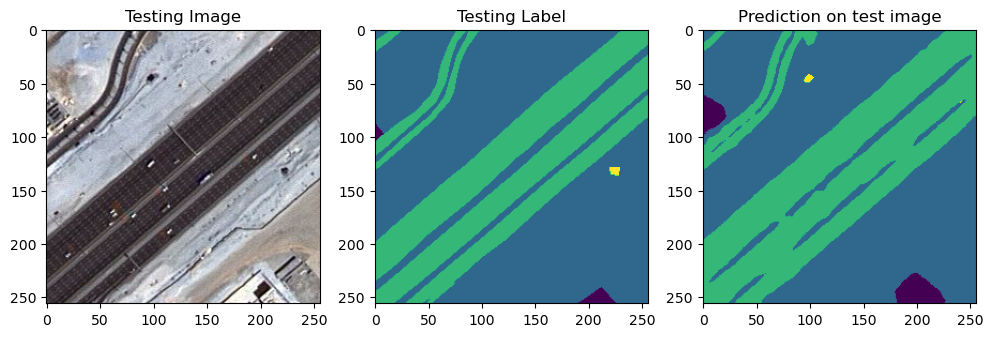

In [104]:
import random
test_img_number = random.randint(0, len(X_test))
test_img = X_test[test_img_number]
ground_truth=y_test_argmax[test_img_number]
#test_img_norm=test_img[:,:,0][:,:,None]
test_img_input=np.expand_dims(test_img, 0)
prediction = (model.predict(test_img_input))
predicted_img=np.argmax(prediction, axis=3)[0,:,:]


plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img)
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth)
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(predicted_img)
plt.show()